#### Importing the Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import csv
import tkinter as tk
from tkinter import filedialog

root = tk.Tk()
root.withdraw()


#### Defining a few useful functions #####


def get_data_from_csv(filepath):#gets capacitance and frequency data from the csv file
    
    csv_fixer(filepath)
    
    new_file_name = filepath.with_name(filepath.stem+"_fixed.csv")
    
    file = pd.read_csv(new_file_name,index_col = 0,header = 2,sep = '\t')
        
    Cap_list = []#list of capacitance data for each loop
    Freq_list = []#list of frequency data for each loop
        
    Sweep = file["Result Number"]
    Cap = file["Impedance Imaginary (Ohms)"]#for some reason all collumns are shifted by one
    Freq = file["Time"]                 #so pandas places the capacitance data on the "Impedance Imaginary (Ohms)" collumn
                                            #and the frequency data on the "Time" collumn
    
    number_of_sweeps = int(Sweep[len(Sweep)-1])
    
    for l in range(number_of_sweeps):
        Cap_list.append(Cap[Sweep == l+1])
        Freq_list.append(Freq[Sweep == l+1])
        
    os.remove(new_file_name)#deletes the "fixed" file after it's done
            
    return Cap_list,Freq_list,number_of_sweeps



def csv_fixer(filepath,skip_lines=3):#shapes the data from SMART's output into something that can be read using pandas
                            #i.e. changes the decimal marker from "," to "." and separates the names of collumns using tab (\t)
                            #then saves it in a file called "(file_name)_fixed.csv"
    
    text = []
    
    with open(filepath) as fp:# reads the input file and copies it to the 'text' variable
        
        for counter in range(skip_lines):#these first few lines are only to ensure the file outputted is the same 
            line = fp.readline()  #as the original with the exception of our few wanted changes, 
            text.append(line)       #even though these few lines are useless and will be ignored later.
            counter += 1
   

        line = fp.readline() #changes the collumn name separators
        text.append(line.replace(',','\t'))
        
        line = fp.readline()
        
        while line:
            
            text.append(line.replace(',','.'))#replaces the decimal marker
            
            line = fp.readline()

            
    new_file_name = filepath.with_name(filepath.stem+"_fixed.csv")
    
    
    with open(new_file_name,'w') as f:#creates the new 'fixed' file
    
        for phrase in text:
            f.write(phrase)
    
    
def list_creator(start=1,end=1,step=1): #a more intuitive version of np.arange
    return np.arange(start-1,end,step) #the default return is np.array([0])
    

#### THIS BLOCK HANDLES THE FILE ACQUISITION ####

In [2]:
#if all files are on the same folder you can just keep number_of_files as 0 and use multi-selection on the pop up window
#if not you have to manually set how many files you are going to open

number_of_files = 1

data_files = []

    
for i in range(number_of_files):#opens the files and gets their addresses
        
    data_files_pre = list(filedialog.askopenfilenames())

    for x in data_files_pre:
        data_files.append(Path(x))
        
    if(len(data_files) >= number_of_files):
        break 

number_of_files = len(data_files)



## THIS USED TO BE USEFUL... NOW I JUST DONT WANNA THROW IT AWAY ><   
    
#default_folder = "Monograph_Script_Images"

#if(not os.path.exists(default_folder)):
#    os.makedirs(default_folder)

    
#save_folder = Path(os.getcwd()+"/"+default_folder)

#### THIS SETS CONDITIONS TO EXCLUDE SPECIFIC SWEEPS FROM SPECIFIC FILES 

In [3]:
def sweep_list(total_number_of_sweeps=0,file_number=0):#this function returns a list with the sweeps you want for 
                                       #each file_number and should be edited when needed
    
    file_number += 1 #accounts for file_number starting at 0 and going to total_number_of_files - 1
    
    ####it is easier if you use the functions list_creator and np.concatenate for this ####
    
    ###### code starts here ####
    
    #if(file_number == 3):
    #    return list_creator(40,total_number_of_sweeps,2)
    
    return np.concatenate((list_creator(1,1,1),list_creator(20,180,20)))

    
    #return np.arange(0,total_number_of_sweeps,8)

#### THIS IS WHERE YOU CHANGE THE LABELS FOR EACH CURVE ON YOUR PLOT

In [4]:
def condition_labelling(sweep=0,file_number=0):# sets the label of a curve according to the sweep number and the file number
                                        #returns a string and should be edited when needed.  
    
    sweep += 1 #accounts for sweep starting at 0 and going to total_number_of_sweeps - 1 and same for file_number
    file_number += 1
    
    #if(file_number == 1):
    #    return "IDE1 Bare"
    #elif(file_number == 2):
    #    return "IDE1 Filme"
    
    return ("Varredura "+str(sweep))

##### AFTER THIS LINE YOU SHOULD ONLY CHANGE PLOT SETTINGS SUCH AS X/Y SCALES AND LIMITS ####

save figure (y/n)?
n


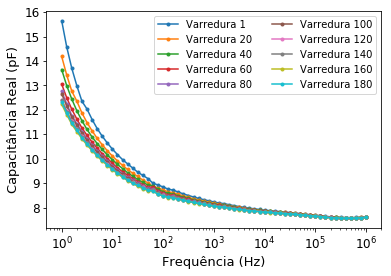

In [6]:
#defining a few parameters here

img_size = 150
font_size = 13
font_axis_ticks = 12
number_of_label_columns = 2
meio = "ar"

for file_number in range(number_of_files):

    file = data_files[file_number]#this file_number can be used to name the electrodes later, so if in each file 
                                #you have a different electrode just use this "file_number" variable to set the label properly
    

    
    Capacitance, Frequency, number_of_sweeps = get_data_from_csv(file)
    

    
    if(meio == "ar"):

        for sweep in sweep_list(number_of_sweeps,file_number):
            
            plt.plot(
                    Frequency[sweep],
                     (10**12)*Capacitance[sweep],
                     "-o",
                     markersize = 3,
                     label = condition_labelling(sweep,file_number)
                     )
                
            plt.xlabel("Frequência (Hz)",fontsize=font_size)
            plt.ylabel("Capacitância Real (pF)",fontsize=font_size)
            plt.legend(loc = "upper right",ncol = number_of_label_columns)
            plt.yticks(fontsize=font_axis_ticks)
            plt.xticks(fontsize=font_axis_ticks)
            #plt.xlim([1,10**3])
            #plt.xlim([10**3,10**6])
            #plt.ylim([7,8.5])
            #plt.yscale("log")
            plt.xscale("log")
                
    elif(meio == "agua"):
        
        for sweep in sweep_list(number_of_sweeps,file_number):
            
            plt.plot(
                    Frequency[sweep],
                    Capacitance[sweep],
                    "-o",
                    markersize = 3,
                    label = condition_labelling(sweep,file_number)
                    )
                
            plt.xlabel("Frequência (Hz)",fontsize=font_size)
            plt.ylabel("Capacitância Real (F)",fontsize=font_size)
            plt.legend(loc = "upper right",ncol = number_of_label_columns)
            plt.yticks(fontsize=font_axis_ticks)
            plt.xticks(fontsize=font_axis_ticks)
            #plt.xlim([1,10**3])
            #plt.xlim([10**3,10**6])
            #plt.ylim([7,8.5])
            plt.yscale("log")
            plt.xscale("log")


#saving the figure

answer = str(input("save figure (y/n)?\n"))

if(answer == "yes" or answer == 'y' or answer == "sim" or answer == 's'):
    save_folder = Path(filedialog.asksaveasfilename(filetypes = (("png files","*.png"),("jpeg files","*.jpg"),("all files","*.*"))).replace(" ","_"))
    plt.savefig(save_folder,dpi=img_size)

plt.show()

#### open the folder where the image was saved directly from jupyter

In [ ]:
path = save_folder
#path = save_folder.parent
path = os.path.realpath(path)
os.startfile(path)

#### NOW PLOTTING CAPACITANCE (ON A FIXED FREQUENCY) OVER TIME

In [ ]:
fixed_freq = 10**3

#### code starts here ####

CapkHz = []

Capacitance, Frequency, number_of_sweeps = get_data_from_csv(Path(filedialog.askopenfilename()))

if(number_of_sweeps > 1):
    for sweep in range(number_of_sweeps):
        f = Frequency[sweep].values.tolist()#the price you pay for using pandas....
        idx = f.index(float(fixed_freq))
        cap = Capacitance[sweep].values.tolist()[idx]
        CapkHz.append(cap)

In [ ]:
for i in range(len(CapkHz)):
    CapkHz[i] *= 10**12

In [ ]:
#plotting preferences go here

measurement_time = 4.8 #minutes 

time = np.arange(0,measurement_time*len(CapkHz),measurement_time)
plt.plot(time,CapkHz,"-o",markersize = 3)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel("Capacitância Real em 1kHz (pF)",fontsize=12)
plt.xlabel("Tempo (Minutos)",fontsize=12)
#plt.yscale("log")
#plt.xscale("log")

#saving the figure

answer = str(input("save figure ?"))

if(answer == "yes" or answer == 'y' ):
    save_folder = Path(filedialog.asksaveasfilename(filetypes = (("png files","*.png"),("jpeg files","*.jpg"),("all files","*.*"))).replace(" ","_"))
    plt.savefig(save_folder,dpi=150)
    
plt.show()

In [ ]:
path = save_folder.parent
path = os.path.realpath(path)
os.startfile(path)